In [39]:
# Comprehensive EDA for Hotel Reservation Data
# This analysis will tell a story about reservation patterns, no-shows, and customer behavior

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime



In [40]:
# Load the dataset
df = pd.read_csv('week 1/first inten project.csv')


In [41]:
# Display first rows
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [42]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [43]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [44]:
# Check data types
df.dtypes.value_counts()


int64      10
object      6
float64     1
Name: count, dtype: int64

In [45]:
# Check null and duplicate values
df.isnull().sum()
df.duplicated().sum()

Null values;
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
Duplicated values;
 0


Outlier Analysis


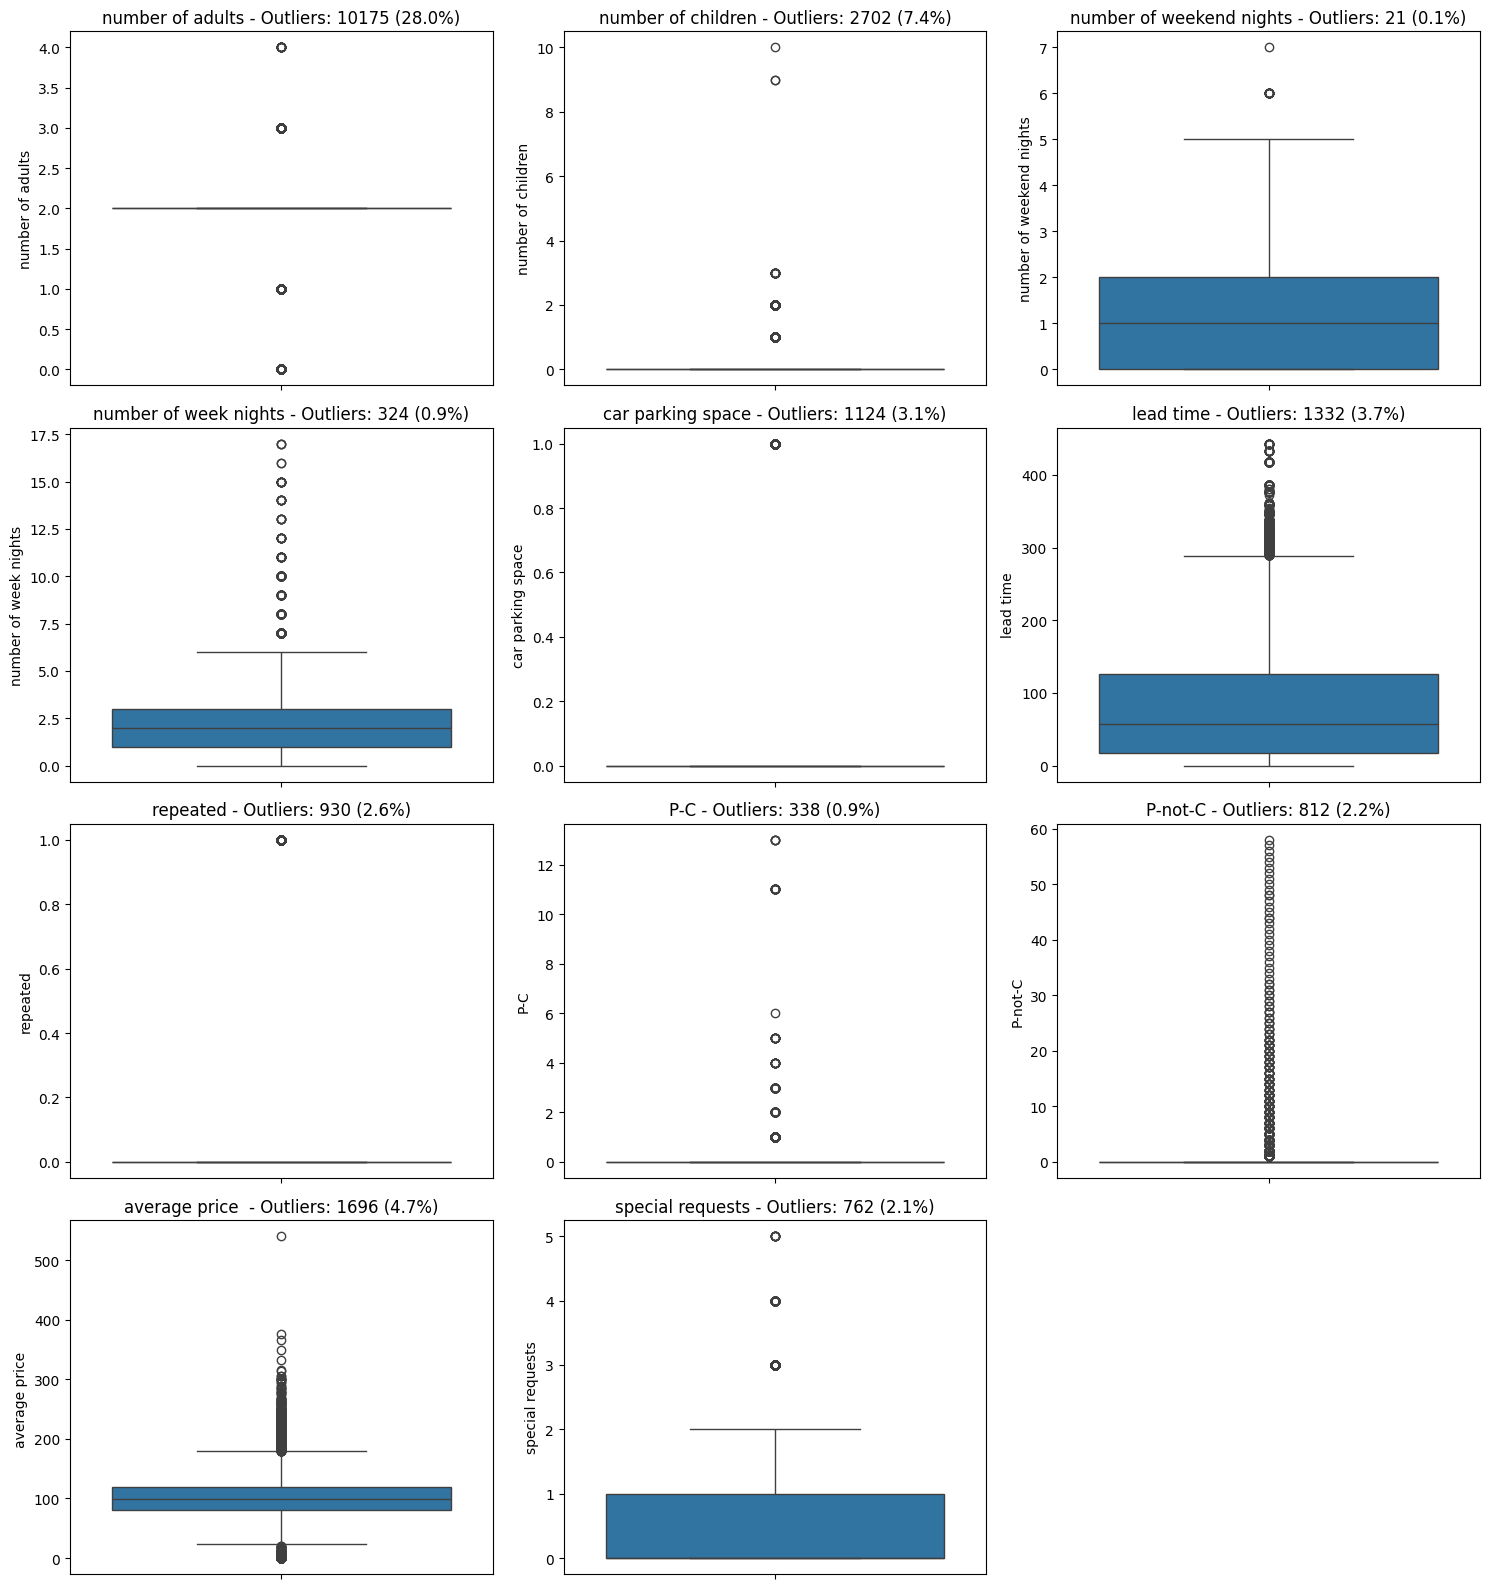


Outlier Summary:
                      Column  Outlier_Count  Outlier_Percentage
0           number of adults          10175               28.04
1         number of children           2702                7.45
9             average price            1696                4.67
5                  lead time           1332                3.67
4          car parking space           1124                3.10
6                   repeated            930                2.56
8                    P-not-C            812                2.24
10          special requests            762                2.10
7                        P-C            338                0.93
3      number of week nights            324                0.89
2   number of weekend nights             21                0.06


In [ ]:
# 5. EXPLORE OUTLIERS
# Get numerical columns and detect outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numerical_cols:
    # Function to detect outliers using IQR method
    def detect_outliers(col):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        return len(outliers), (len(outliers) / len(df)) * 100
    
    # Create boxplots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        outlier_count, outlier_pct = detect_outliers(col)
        
        sns.boxplot(y=df[col])
        plt.title(f'{col} - Outliers: {outlier_count} ({outlier_pct:.1f}%)')
    
    plt.tight_layout()
    plt.show()
    
    # Create summary table
    summary_data = []
    for col in numerical_cols:
        outlier_count, outlier_pct = detect_outliers(col)
        summary_data.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_pct
        })
    
    outlier_df = pd.DataFrame(summary_data).sort_values('Outlier_Percentage', ascending=False)
    print("\nOutlier Summary:")
    print(outlier_df.round(2))
else:
    print("No numerical columns found")


📈 Numerical Variable Distributions:
 number of adults: Skewness = -0.333 (Left skewed)
 number of children: Skewness = 4.707 (Right skewed)
 number of weekend nights: Skewness = 0.738 (Right skewed)
 number of week nights: Skewness = 1.599 (Right skewed)
 car parking space: Skewness = 5.414 (Right skewed)
 lead time: Skewness = 1.292 (Right skewed)
 repeated: Skewness = 6.004 (Right skewed)
 P-C: Skewness = 25.202 (Right skewed)
 P-not-C: Skewness = 19.252 (Right skewed)
 average price : Skewness = 0.667 (Right skewed)
 special requests: Skewness = 1.145 (Right skewed)


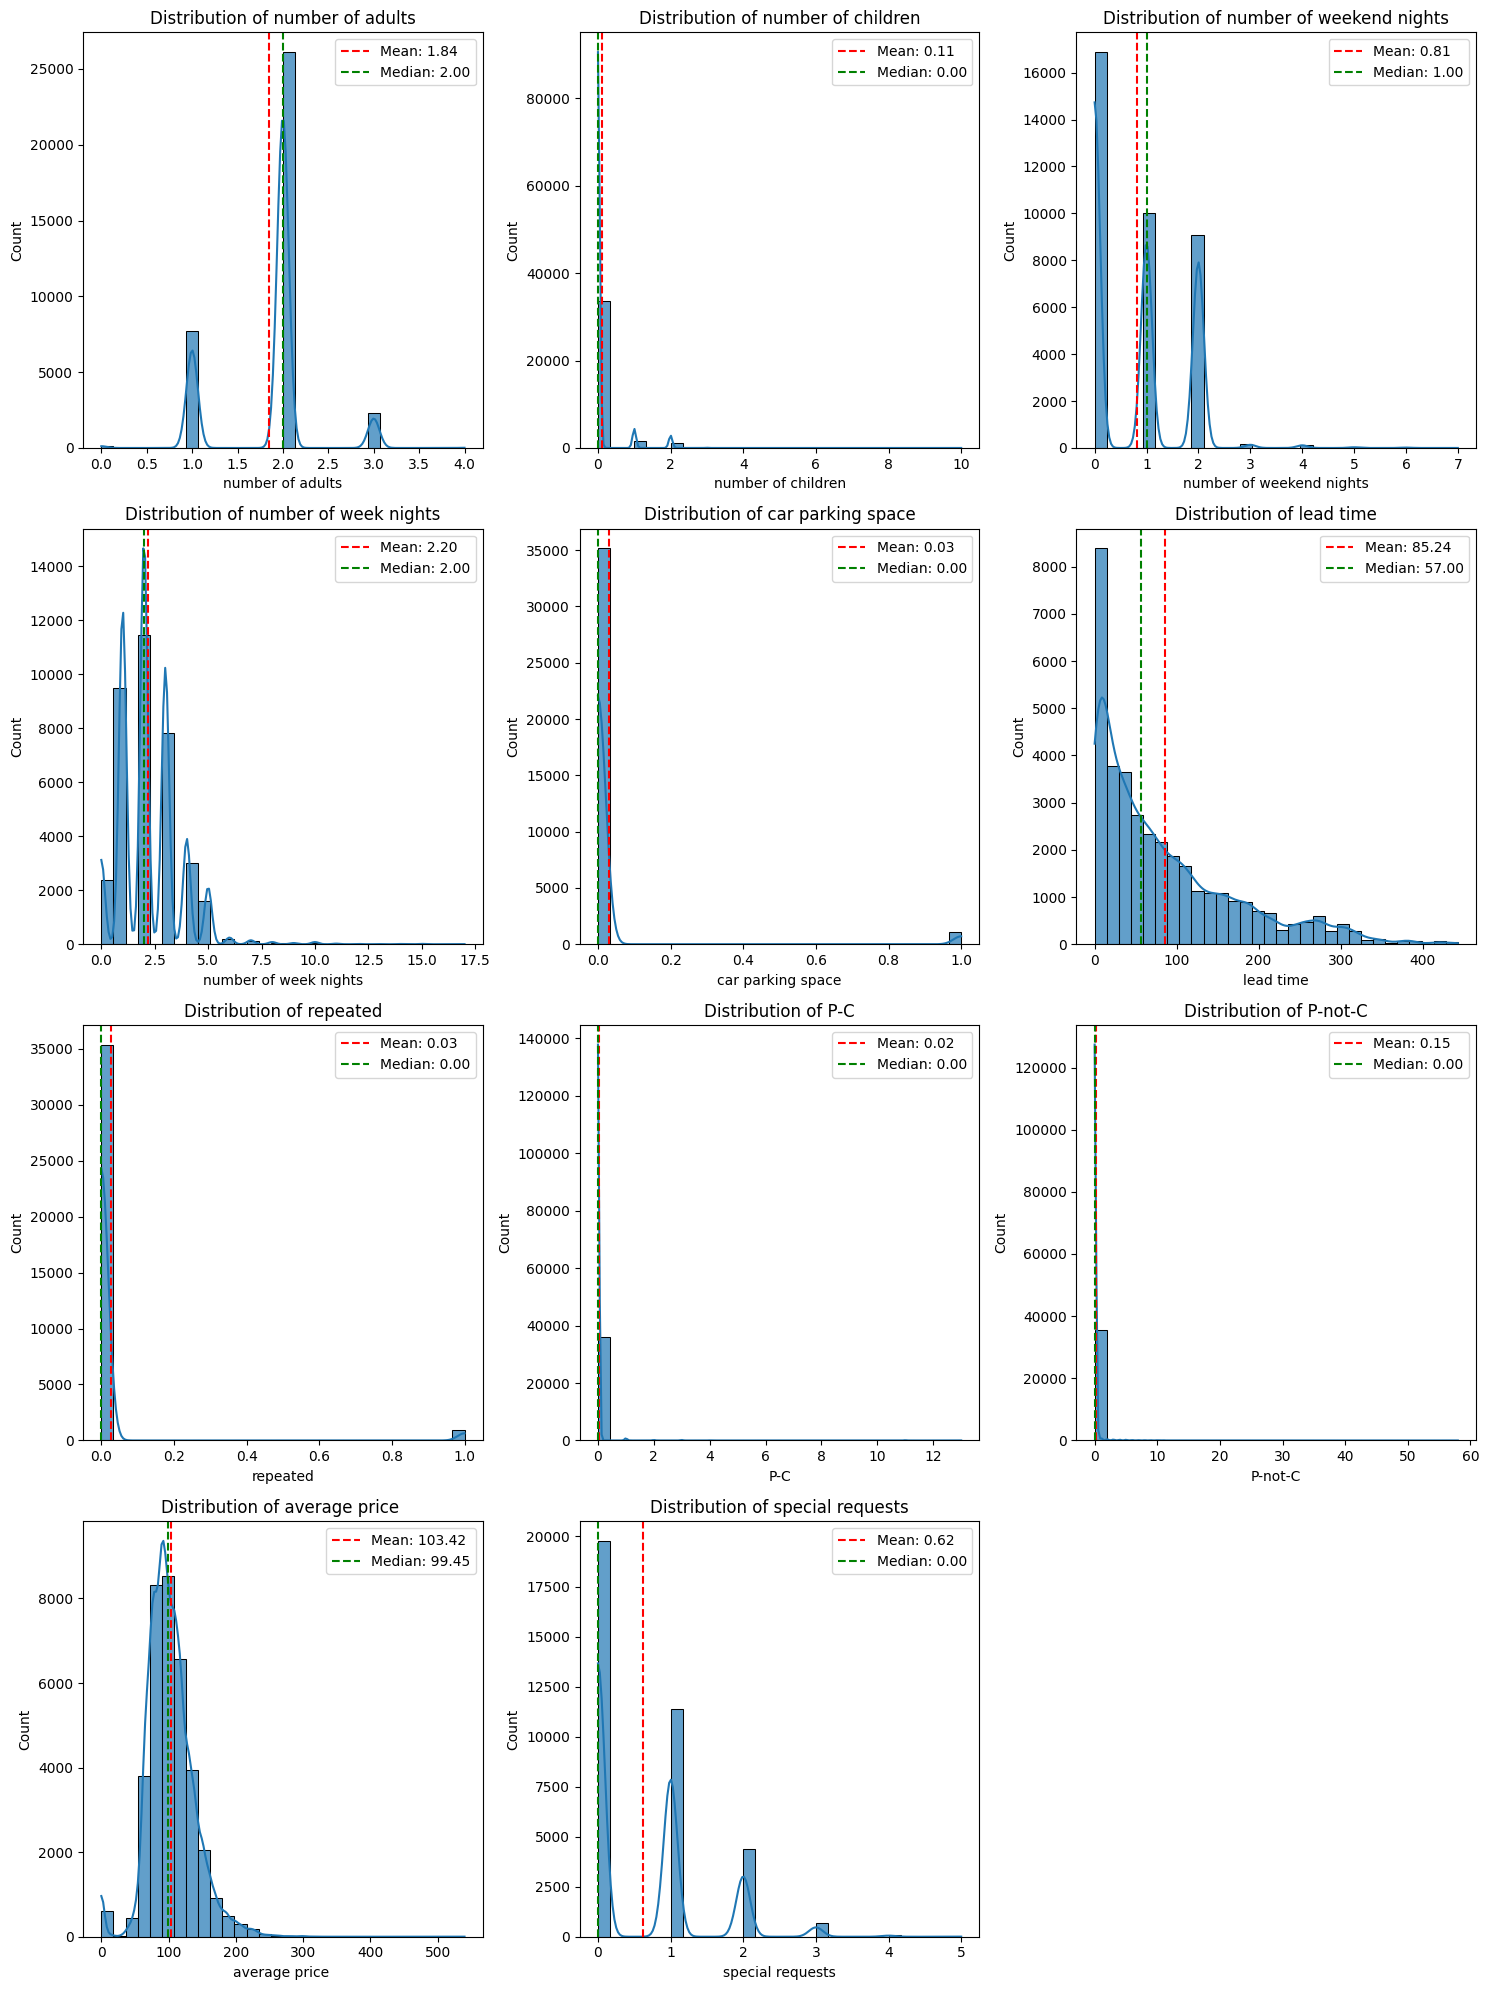


📝 Categorical columns found: 6

📊 Booking_ID - Value Counts:
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
INN24191    1
INN24192    1
INN24193    1
INN24195    1
INN24186    1
Name: count, dtype: int64
    Too many unique values (36285) to plot effectively

📊 type of meal - Value Counts:
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64


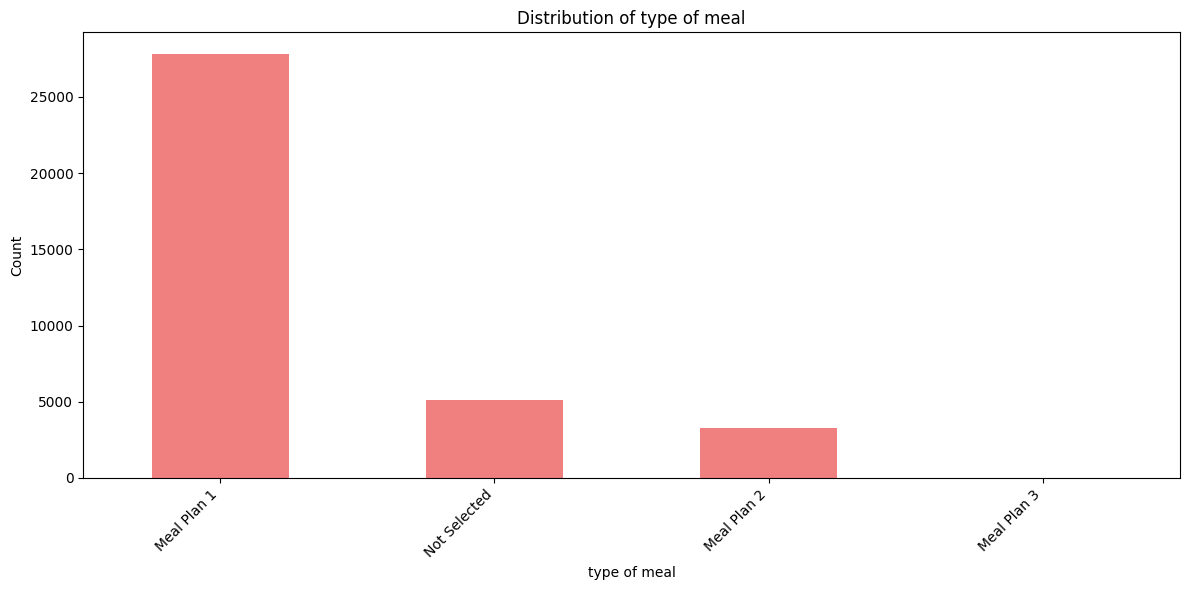


📊 room type - Value Counts:
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


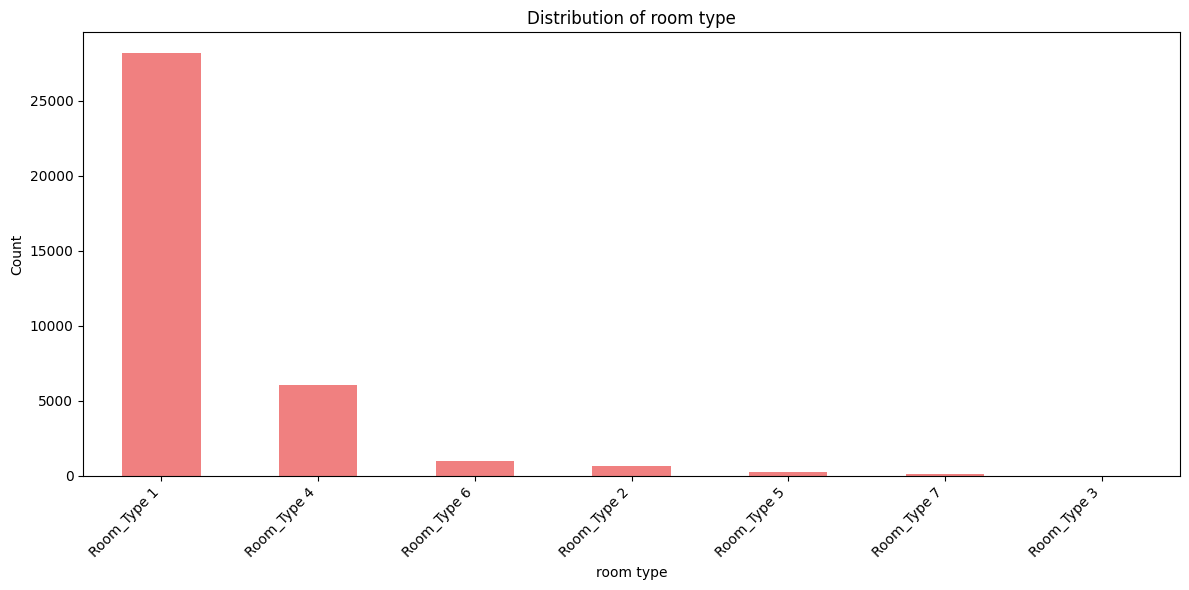


📊 market segment type - Value Counts:
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


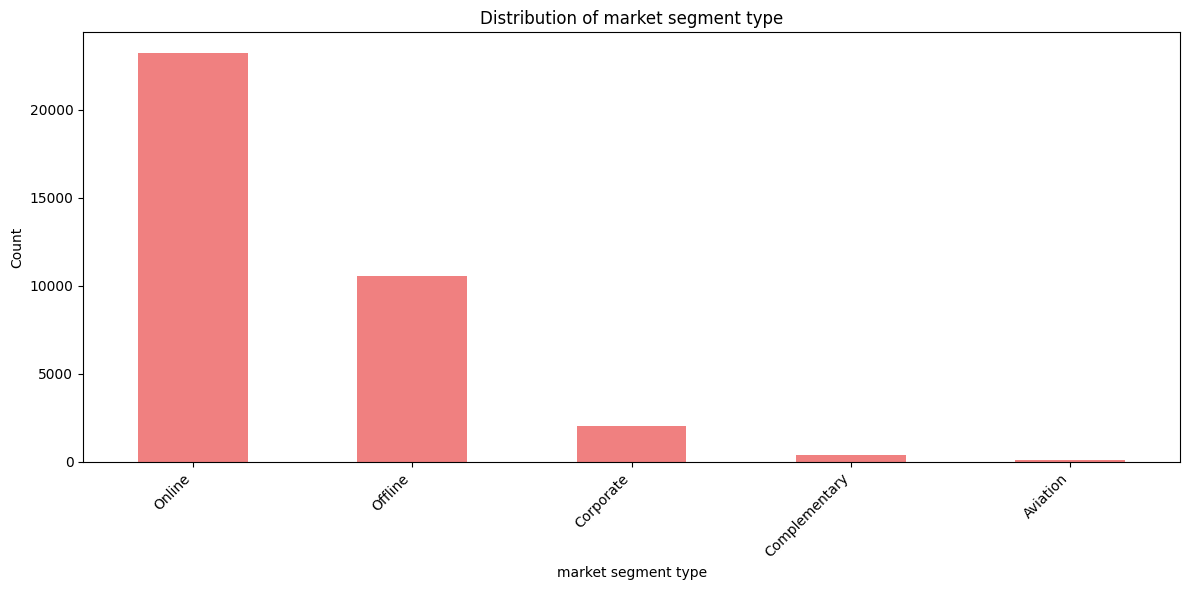


📊 date of reservation - Value Counts:
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
5/13/2018     200
8/14/2017     191
9/15/2018     185
4/6/2018      184
9/26/2018     184
Name: count, dtype: int64
    Too many unique values (553) to plot effectively

📊 booking status - Value Counts:
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


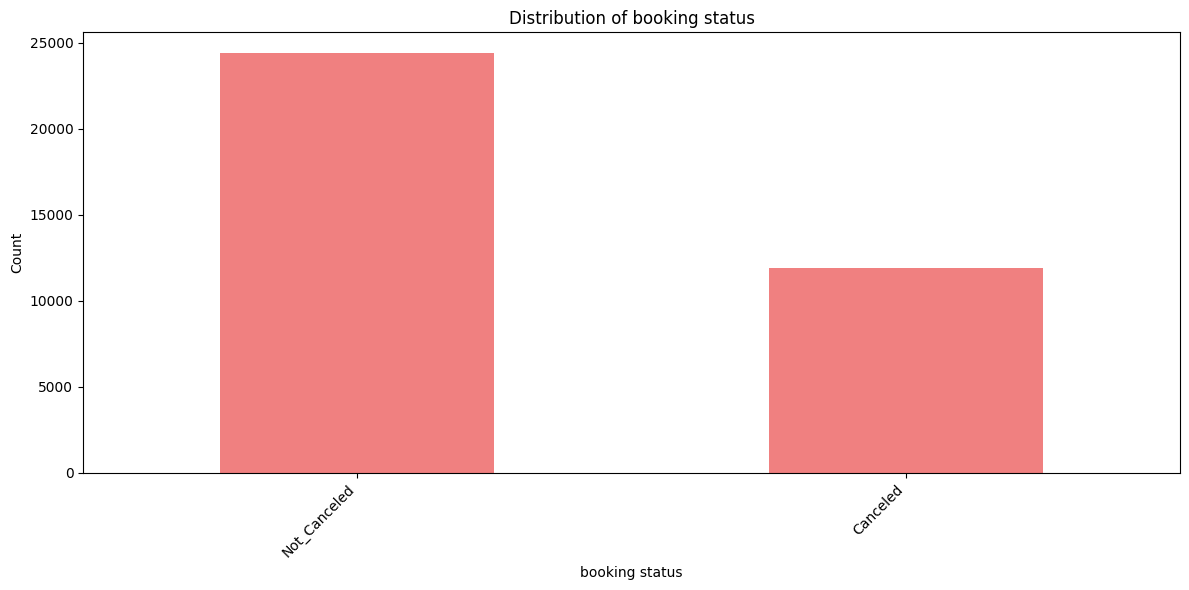


 Distribution Summary:
    Numerical columns: 11
    Categorical columns: 6
    Total columns analyzed: 17


In [47]:
# 6. VISUALIZE DISTRIBUTIONS
# A. NUMERICAL DISTRIBUTIONS
if numerical_cols:
    print("📈 Numerical Variable Distributions:")
    
    # Create distribution plots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, bins=30, alpha=0.7)
        plt.title(f'Distribution of {col}')
        
        # Add statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        
        plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        plt.legend()
        
        # Print skewness
        skewness = stats.skew(df[col].dropna())
        print(f" {col}: Skewness = {skewness:.3f} ({'Right' if skewness > 0 else 'Left' if skewness < 0 else 'Normal'} skewed)")
    
    plt.tight_layout()
    plt.show()

# B. CATEGORICAL DISTRIBUTIONS
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n📝 Categorical columns found: {len(categorical_cols)}")

if categorical_cols:
    # Show value counts for each categorical column
    for col in categorical_cols[:10]:  # Limit to first 10 to avoid overwhelming output
        print(f"\n📊 {col} - Value Counts:")
        value_counts = df[col].value_counts()
        print(value_counts.head(10))  # Show top 10 values
        
        # Create bar plot for categorical variables with manageable number of categories
        if len(value_counts) <= 20:  # Only plot if 20 or fewer categories
            plt.figure(figsize=(12, 6))
            value_counts.head(10).plot(kind='bar', color='lightcoral')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"    Too many unique values ({len(value_counts)}) to plot effectively")

print(f"\n Distribution Summary:")
print(f"    Numerical columns: {len(numerical_cols)}")
print(f"    Categorical columns: {len(categorical_cols)}")
print(f"    Total columns analyzed: {len(numerical_cols) + len(categorical_cols)}")


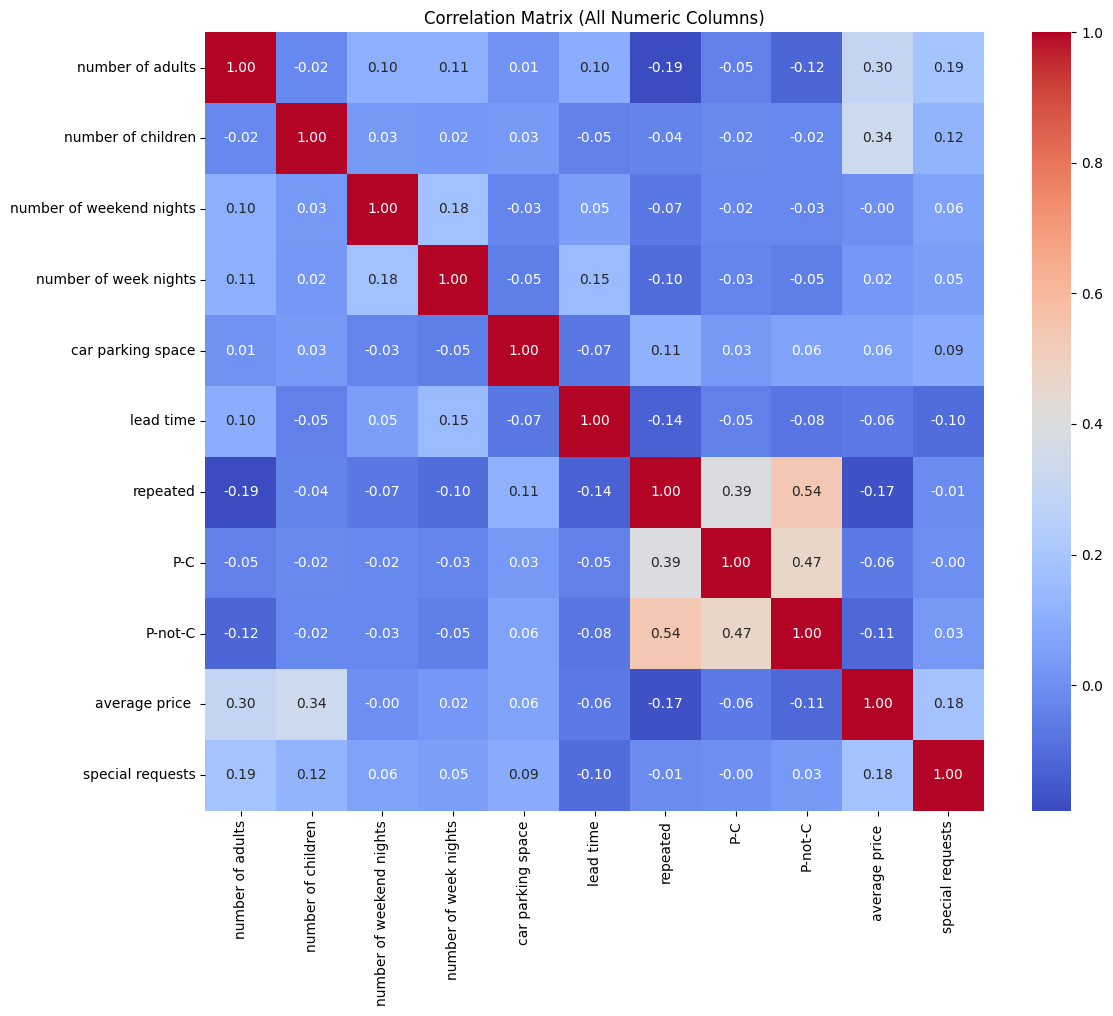

In [48]:
# 7. CORRELATION ANALYSIS - Show correlation matrix for all columns (numeric only)
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (All Numeric Columns)")
plt.tight_layout()
plt.show()


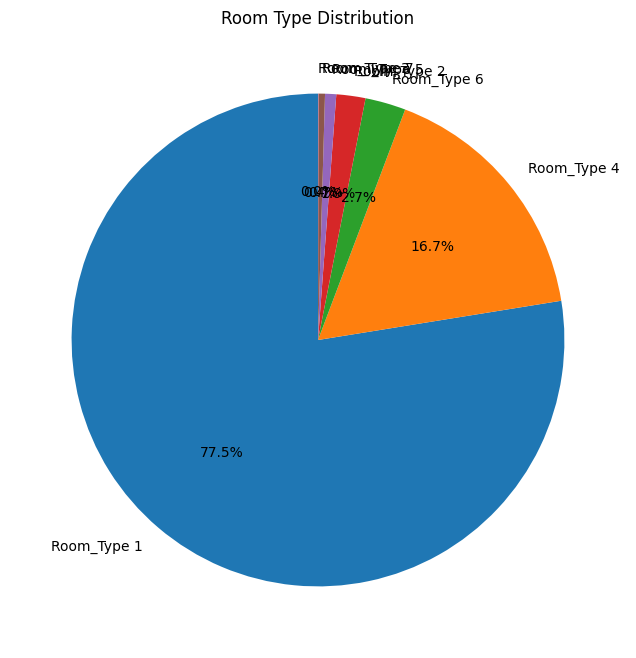

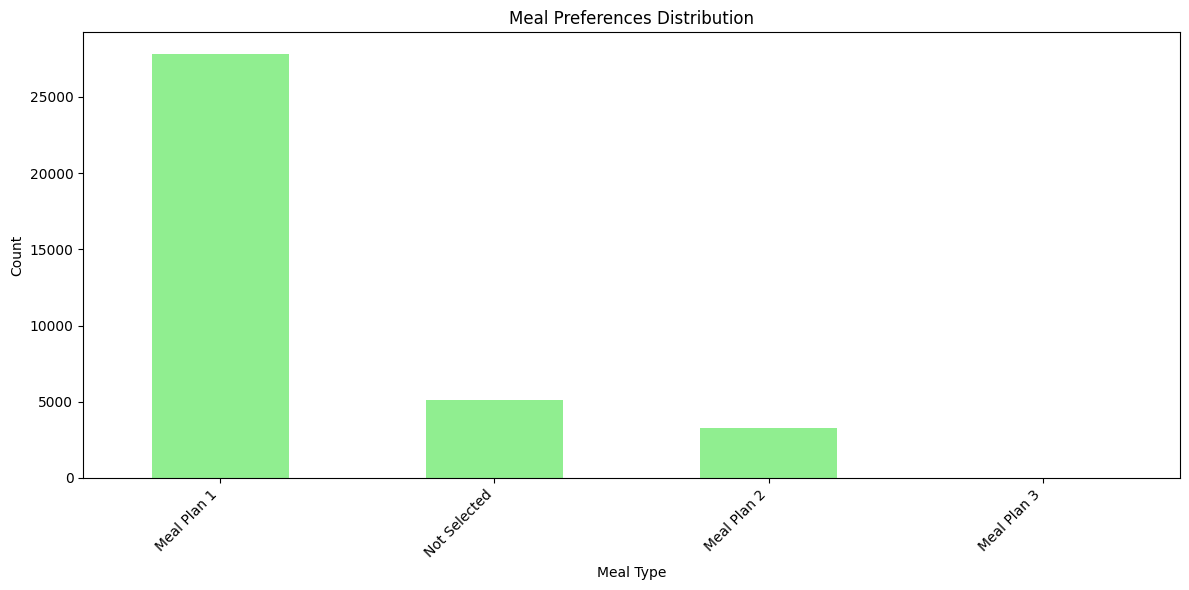

In [57]:
# 8. BUSINESS INSIGHTS & VISUALIZATIONS

# Room type distribution using pie plot
room_type_counts = df['room type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(room_type_counts.values, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Room Type Distribution')
plt.show()

# Meal preferences using bar plot
meal_counts = df['type of meal'].value_counts()
plt.figure(figsize=(12, 6))
meal_counts.plot(kind='bar', color='lightgreen')
plt.title('Meal Preferences Distribution')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


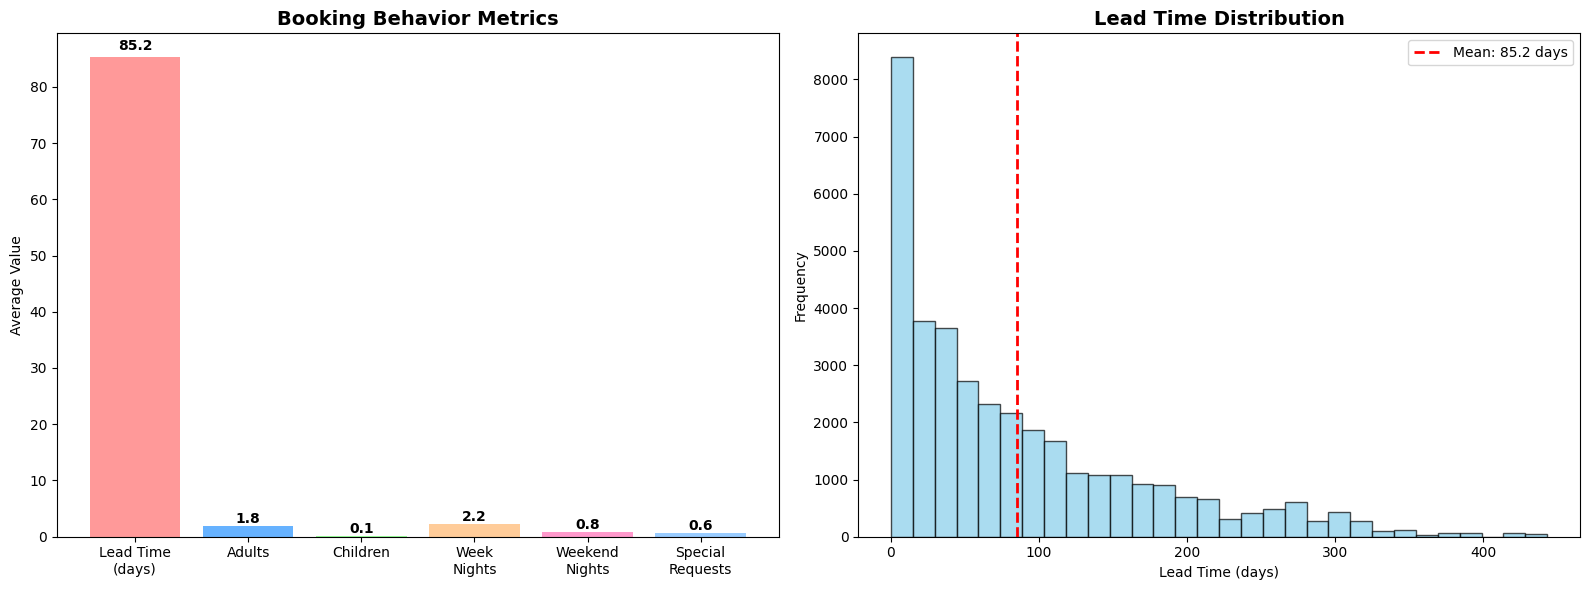

In [61]:
# Calculate key metrics
lead_time_avg = df['lead time'].mean()
adults_avg = df['number of adults'].mean()
children_avg = df['number of children'].mean()
week_nights_avg = df['number of week nights'].mean()
weekend_nights_avg = df['number of weekend nights'].mean()
special_requests_avg = df['special requests'].mean()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of metrics
metrics = ['Lead Time\n(days)', 'Adults', 'Children', 'Week\nNights', 'Weekend\nNights', 'Special\nRequests']
values = [lead_time_avg, adults_avg, children_avg, week_nights_avg, weekend_nights_avg, special_requests_avg]
colors_behavior = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

bars = ax1.bar(metrics, values, color=colors_behavior)
ax1.set_title('Booking Behavior Metrics', fontweight='bold', fontsize=14)
ax1.set_ylabel('Average Value')

# Add value labels
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Lead time distribution
ax2.hist(df['lead time'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax2.axvline(lead_time_avg, color='red', linestyle='--', linewidth=2, label=f'Mean: {lead_time_avg:.1f} days')
ax2.set_title('Lead Time Distribution', fontweight='bold', fontsize=14)
ax2.set_xlabel('Lead Time (days)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.savefig('slide7_booking_behavior.png', dpi=300, bbox_inches='tight')
plt.show()
